## Exploratory Data Analysis


In [38]:
# import all the library

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [6]:
# Create a dataframe

cwd = os.getcwd()
df = pd.read_csv(cwd + "/cleaned-BA-reviews.csv", index_col=0)

In [7]:
df.head()

,reviews,star,date,country,verified,corpus
0,✅ Trip Verified | Boarding was difficult caus...,5,2024-03-14,Belgium,True,boarding difficult caused vast majority passen...
1,✅ Trip Verified | Boarding started with a del...,7,2024-03-14,Belgium,True,boarding started delay minute everybody could ...
2,✅ Trip Verified | Absolutely horrible custome...,3,2024-03-12,Canada,True,absolutely horrible customer service never fly...
3,Not Verified | BA is not what it used to be! ...,1,2024-03-11,Denmark,False,verified ba used much like onboard crew check ...
4,"✅ Trip Verified | BA First, it's not even the...",7,2024-03-10,United Kingdom,True,ba first even best business class sky cabin lo...


In [8]:
# Check the star overall rating
df.star.mean()

4.595994277539342

Text(0, 0.5, 'Total number of reviews of the rating')

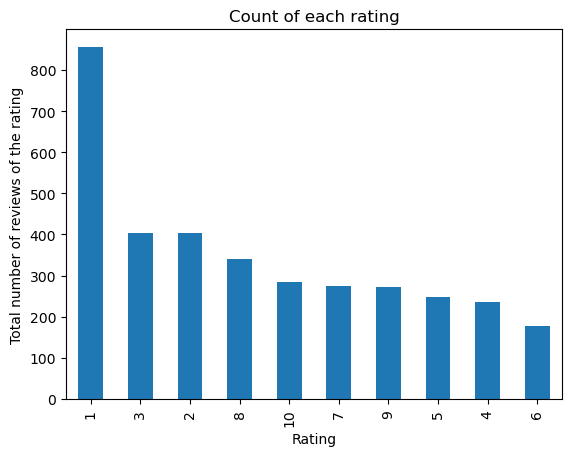

In [9]:
# By using bar plot we can see each of rating

df.star.value_counts().plot(kind="bar")

plt.title("Count of each rating")
plt.xlabel("Rating")
plt.ylabel("Total number of reviews of the rating")

In [10]:
df_rating = pd.DataFrame(df.star.value_counts())
per_value = (df_rating.star.values / df_rating.star.values.sum() * 100).tolist()
per_value = [round(x, 2) for x in per_value]
df_rating["per_value"] = per_value

In [11]:
# resetting index as we do not want to confuse between the index and the rating values
df_rating = df_rating.reset_index()

In [12]:
# Rennamig the columns

df_rating.rename(columns={"index": "Star", "star": "total_count"}, inplace=True)

In [13]:
df_rating

,Star,total_count,per_value
0,1,856,24.49
1,3,403,11.53
2,2,403,11.53
3,8,340,9.73
4,10,285,8.15
5,7,274,7.84
6,9,273,7.81
7,5,247,7.07
8,4,236,6.75
9,6,178,5.09


In [14]:
# Unique Country has recieve rating in British Airways

print(f"{len(df.country.unique())} unique country")

70 unique country


**_Which country has most reviews comes_**


In [15]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [16]:
df_country_review

,index,country
0,United Kingdom,2175
1,United States,402
2,Australia,145
3,Canada,108
4,Germany,63


In [17]:
df_country_review.rename(
    columns={"index": "country", "country": "total_reviews"}, inplace=True
)

In [18]:
df_country_review

,country,total_reviews
0,United Kingdom,2175
1,United States,402
2,Australia,145
3,Canada,108
4,Germany,63


Text(0, 0.5, 'Number of most reviews comes from each country')

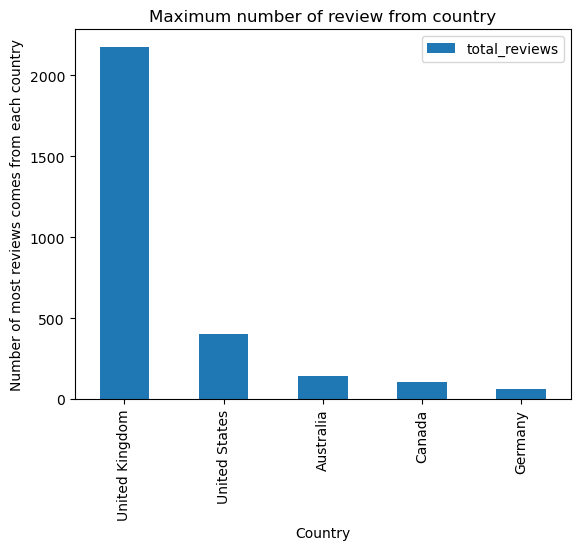

In [19]:
df_country_review.plot(kind="bar", x="country")
plt.title("Maximum number of review from country")
plt.xlabel("Country")
plt.ylabel("Number of most reviews comes from each country")

**_Which country provide average number of rating_**


In [20]:
df_country_avg_review = pd.DataFrame(
    df.groupby("country")["star"].mean().sort_values(ascending=False)
).reset_index()

In [21]:
df_country_avg_review

,country,star
0,Ecuador,10.000000
1,Indonesia,10.000000
2,Jordan,10.000000
3,Finland,8.000000
4,Philippines,7.500000
...,...,...
65,Nigeria,1.333333
66,Saint Kitts and Nevis,1.000000
67,Russian Federation,1.000000
68,Bahrain,1.000000


In [22]:
df_country_avg_review.rename(columns={"star": "avg_rating"}, inplace=True)

In this df_country_avg_review has 70 country. we will go through top 15 country


Text(0.5, 1.0, 'Top 15 Countries with avg highest rating provided to British Airways')

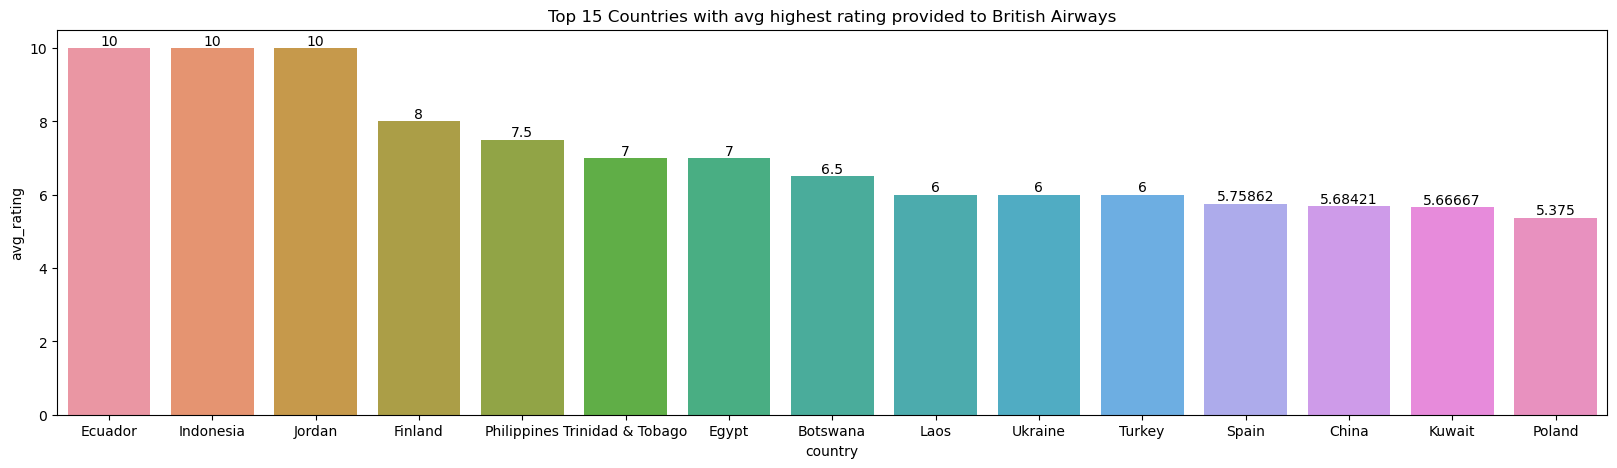

In [23]:
fig, ax = plt.subplots(figsize=(20, 5))
ax1 = sns.barplot(x="country", y="avg_rating", data=df_country_avg_review[:15])
ax.bar_label(ax.containers[0])
ax.set_title("Top 15 Countries with avg highest rating provided to British Airways")

**_Time Series Analysis_**


In [24]:
# convert the date datetype to datetime
df.date = pd.to_datetime(df.date)

In [25]:
fig = px.line(df, x="date", y="star")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

- It can seen in between April 2020 to August 2021 has decreases of the review due to the Covid Pandemic travel restrictions.
- At this point as the dates we have are from when customers posted their reviews, not taking into account the actual flight date.
- Therefore, no special meaningful trend is visible from the story.


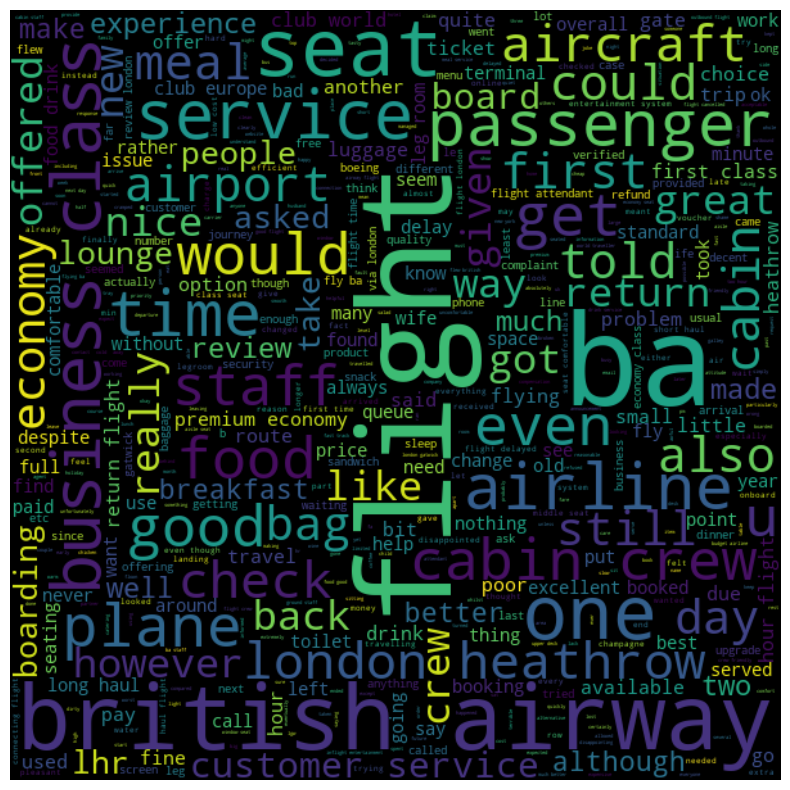

In [47]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

review = " ".join(df.corpus)
plt.figure(figsize=(20, 10))

stopwords = set(stopwords.words("english"))

# Create and generate word Cloud
wordcloud = WordCloud(
    height=600, width=600, max_font_size=100, max_words=500, stopwords=stopwords
).generate(review)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**_Word Ferquency_**


In [53]:
from nltk import ngrams
from nltk.probability import FreqDist
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

# Split text of all reviews into list of words

word = review.split(" ")

# remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(
    [
        "flight",
        "ba",
        "passenger",
        "u",
        "london",
        "airway",
        "british",
        "airline",
        "heathrow",
        "plane",
        "lhr",
        "review",
    ]
)


new_word = [word for word in word if word not in stopwords]

nlp_words = FreqDist(new_word).most_common(20)

# create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))